## Test AWA Environment/Interface Plugins

In [1]:
from plugins.environments.awa_environment import AWAEnvironment
from plugins.interfaces.test_awa_interface import TestAWAInterface

env = AWAEnvironment(interface=TestAWAInterface(), variables={"Q6:BCTRL":[-1,1]})

In [2]:
env.dict()

{'name': 'awa_environment',
 'interface': {'name': 'awa_interface', 'params': {}, 'x': None, 'y': None},
 'variables': {'Q6:BCTRL': [-1.0, 1.0]},
 'observables': ['AWAICTMon:Ch1',
  'AWAICTMon:Ch2',
  'AWAICTMon:Ch3',
  'AWAICTMon:Ch4',
  'YAG1:XRMS',
  'YAG1:YRMS'],
 'params': {},
 'target_charge_PV': 'AWAICTMon:Ch1',
 'target_charge': None,
 'fractional_charge_deviation': 0.1}

In [3]:
env.set_variables({"Q6:BCTRL": 0.5})

In [4]:
env.get_observables(["YAG1:XRMS","YAG1:YRMS"])

{'YAG1:XRMS': 0.5, 'YAG1:YRMS': 0.0, 'AWAICTMon:Ch1': 1.0}

## Test with Xopt BE

In [5]:
from xopt import Xopt, Evaluator, VOCS
from xopt.generators.bayesian import BayesianExplorationGenerator

def evaluate(inputs):
    env.set_variables(inputs)
    return env.get_observables(env.observables)

vocs = VOCS(variables=env.variables, objectives={"YAG1:XRMS":"MINIMIZE"}, constraints={"YAG1:YRMS":["GREATER_THAN",0.0]})
generator = BayesianExplorationGenerator(vocs)
evaluator = Evaluator(function=evaluate)
X = Xopt(vocs=vocs, evaluator=evaluator, generator=generator)

In [6]:
vocs.dict()

{'variables': {'Q6:BCTRL': [-1.0, 1.0]},
 'constraints': {'YAG1:YRMS': ['GREATER_THAN', 0.0]},
 'objectives': {'YAG1:XRMS': 'MINIMIZE'},
 'constants': {},
 'linked_variables': {}}

In [7]:
import pandas as pd
X.evaluate_data(pd.DataFrame({"Q6:BCTRL":[0.0,0.1]}))

,Q6:BCTRL,AWAICTMon:Ch1,YAG1:XRMS,YAG1:YRMS,xopt_runtime,xopt_error
1,0.0,1.0,0.0,0.5,0.000059,False
2,0.1,1.0,0.1,0.4,0.000022,False


In [9]:
for i in range(10):
    X.step()

/global/common/software/m669/rroussel/conda/awa-badger/lib/python3.9/site-packages/botorch/optim/optimize.py:366: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
/global/common/software/m669/rroussel/conda/awa-badger/lib/python3.9/site-packages/botorch/optim/optimize.py:390: RuntimeWarning: Optimization failed on the second try, after generating a new set of initial conditions.
  warnings.warn(


In [10]:
X.data

,Q6:BCTRL,AWAICTMon:Ch1,YAG1:XRMS,YAG1:YRMS,xopt_runtime,xopt_error
1,0.000000,1.0,0.000000,0.500000,0.000059,False
2,0.100000,1.0,0.100000,0.400000,0.000022,False
3,-1.000000,1.0,1.000000,-0.500000,0.000062,False
4,-0.392787,1.0,0.392787,0.107213,0.000063,False
5,0.297180,1.0,0.297180,0.202820,0.000061,False
6,0.759159,1.0,0.759159,-0.259159,0.000060,False
7,-0.223823,1.0,0.223823,0.276177,0.000045,False
8,0.394187,1.0,0.394187,0.105813,0.000047,False
9,-0.450012,1.0,0.450012,0.049988,0.000057,False
10,-0.115379,1.0,0.115379,0.384621,0.000041,False


<Axes: xlabel='Q6:BCTRL'>

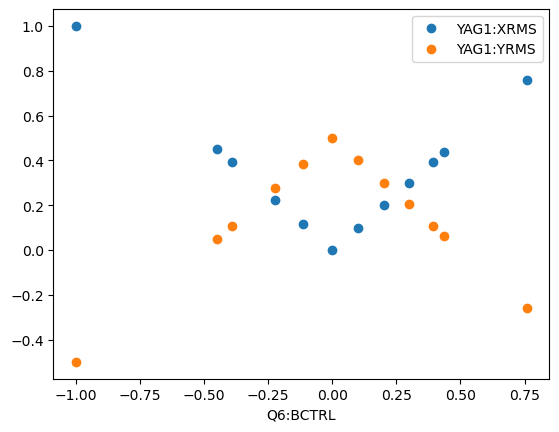

In [11]:
X.data.plot(x="Q6:BCTRL", y=["YAG1:XRMS","YAG1:YRMS"],style="o")

In [12]:
model = X.generator.model

In [13]:
model

ModelListGP(
  (models): ModuleList(
    (0-1): 2 x SingleTaskGP(
      (likelihood): GaussianLikelihood(
        (noise_covar): HomoskedasticNoise(
          (noise_prior): GammaPrior()
          (raw_noise_constraint): GreaterThan(1.000E-04)
        )
      )
      (mean_module): ConstantMean()
      (covar_module): ScaleKernel(
        (base_kernel): MaternKernel(
          (lengthscale_prior): GammaPrior()
          (raw_lengthscale_constraint): Positive()
        )
        (outputscale_prior): GammaPrior()
        (raw_outputscale_constraint): Positive()
      )
      (outcome_transform): Standardize()
      (input_transform): Normalize()
    )
  )
  (likelihood): LikelihoodList(
    (likelihoods): ModuleList(
      (0-1): 2 x GaussianLikelihood(
        (noise_covar): HomoskedasticNoise(
          (noise_prior): GammaPrior()
          (raw_noise_constraint): GreaterThan(1.000E-04)
        )
      )
    )
  )
)